<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

import seaborn as sns

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

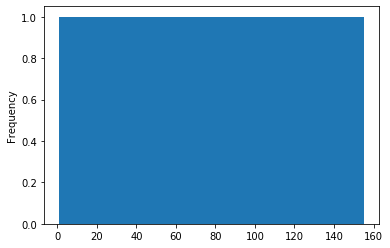

In [4]:
# freedom.sort_values()
freedom = df.Freedom
df.Freedom.plot.hist(bins=len(df.Freedom)-1)

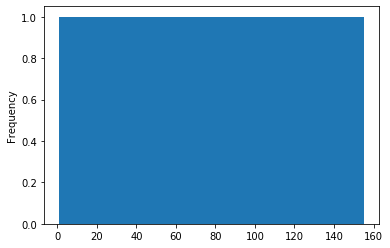

In [5]:
social_support = df["Social support"]
social_support.plot.hist(bins=len(df)-1)

*Тип распределения - равномерное*

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [6]:
# Стандартное отклонение
def stdev(nums):
    diffs = 0
    avg = sum(nums)/len(nums)
    for n in nums:
        diffs += (n - avg)**(2)
    return (diffs/(len(nums)-1))**(0.5)

methods_to_apply = [statistics.median, statistics.mode, statistics.mean, stdev, statistics.pvariance, min, max]
# В зависимости о того, как поступить с выбросами - получаются разные результаты. 
# Учитывая, что значение - это ранг - логично пустые удалить.
freedom_cleared = freedom[freedom > 0]
for method in methods_to_apply:
    try:
        print(f"{str(method)}: {method(freedom_cleared)}")
    except Exception as e:
        print(f"{str(method)}: {e}")

<function median at 0x0000014F83376048>: 78.0
<function mode at 0x0000014F83376268>: no unique mode; found 155 equally common values
<function mean at 0x0000014F8336CEA0>: 78.0
<function stdev at 0x0000014F84E22D90>: 44.88875137492688
<function pvariance at 0x0000014F83376400>: 2002.0
<built-in function min>: 1.0
<built-in function max>: 155.0


In [7]:
df[freedom.isnull()]
# Катар - выброс.

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


Почему нельзя найти моду?

*Моду посчитать не получается т.к. все 156 элементов встречаются по 1 разу.*

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

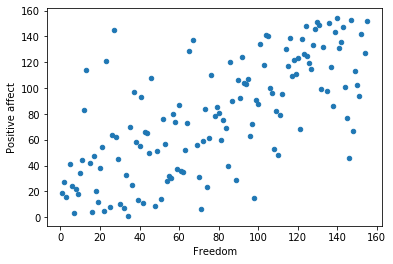

In [8]:
df.dropna().plot(x="Freedom", y="Positive affect", kind="scatter")
plt.show()

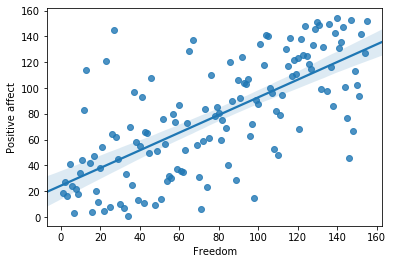

In [9]:
# Альтернативно
df_cleared = df.dropna()
sns.regplot(x=df_cleared["Freedom"], y=df_cleared["Positive affect"],data=df, fit_reg=True)
plt.show()

In [10]:
from scipy.stats import pearsonr

In [11]:
corr, p_value = pearsonr(df_cleared["Freedom"], df_cleared["Positive affect"])
print(f'Коэффициент корреляции Пирсона: {corr:1.4} (сильная положительная корреляция '
      '- при увеличении первой переменной вторая также увеличивается)')

Коэффициент корреляции Пирсона: 0.6966 (сильная положительная корреляция - при увеличении первой переменной вторая также увеличивается)


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [12]:
from sklearn import preprocessing

In [13]:
# Централизация
freedom = df.dropna().Freedom
freedom_c = freedom - freedom.mean()
functions_to_apply = [statistics.mean, min, max]
for f in functions_to_apply:
    try:
        print(f"{str(f)}: {f(freedom_c):2.2f}")
    except Exception as e:
        print(f"{str(f)}: {e}")

<function mean at 0x0000014F8336CEA0>: 0.00
<built-in function min>: -77.83
<built-in function max>: 76.17


In [14]:
# Масштабирование
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
freedom_n = min_max_scaler.fit_transform(np.array(freedom_c).reshape(-1, 1))
functions_to_apply = [np.mean, np.min, np.max]
for f in functions_to_apply:
    try:
        print(f"{str(f)}: {f(freedom_n):2.4f}")
    except Exception as e:
        print(f"{str(f)}: {e}")

<function mean at 0x0000014FFFB31E18>: 0.0108
<function amin at 0x0000014FFFB316A8>: -1.0000
<function amax at 0x0000014FFFB31598>: 1.0000


Построить матрицу корреляций для всех колонок таблицы

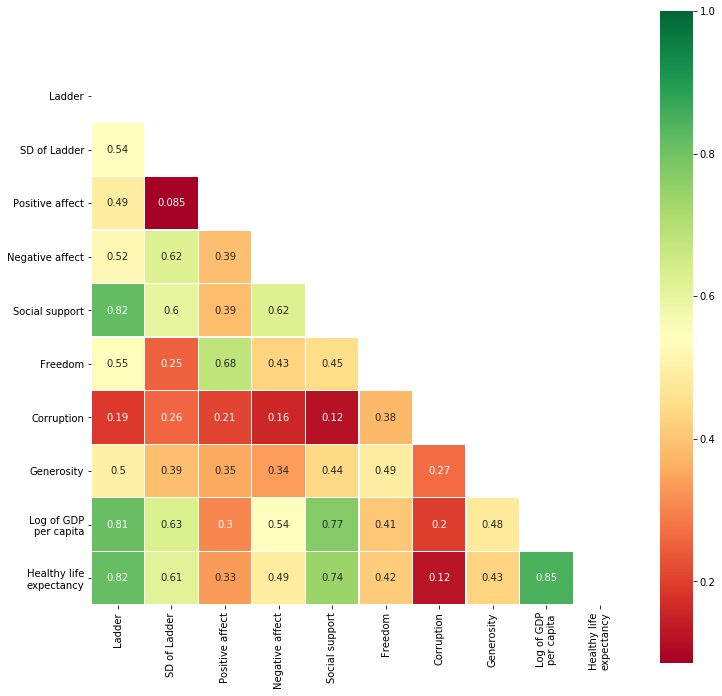

In [15]:
plt.figure(figsize = (12,12))

corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=corr, mask=mask, annot=True, cmap='RdYlGn', linewidths=0.2, square=True)
plt.show()

В данном датасете некоторые атрибуты значительно коррелируют. Какие? Почему?

In [16]:
strong_corr = corr                              \
                .mask(mask)                     \
                .mask(abs(corr)<=0.6)           \
                .unstack()                      \
                .sort_values()                  \
                .sort_values(ascending = False) \
                .dropna()

mid_corr = corr \
                .mask(mask)                     \
                .mask(abs(corr)<=0.3)           \
                .mask(abs(corr)>0.6)            \
                .unstack()                      \
                .sort_values()                  \
                .sort_values(ascending = False) \
                .dropna()

corr_dict = ({
            "Сильные корреляции (0.6 <= x < 1)"  : strong_corr,
            "Средние корреляции (0.3 < x < 0.6):": mid_corr
            })

for corr_lvl, corr_data in corr_dict.items():
    print(corr_lvl)
    for key, value in corr_data.items():
        param1 = "|" + key[0].replace('\n',' ') + "|" 
        param2 = "|" + key[1].replace('\n',' ') + "|" 
        print(f"{param1} to {param2}: {value:1.3f}")
    print() 


Сильные корреляции (0.6 <= x < 1)
|Log of GDP per capita| to |Healthy life expectancy|: 0.848
|Ladder| to |Social support|: 0.818
|Ladder| to |Healthy life expectancy|: 0.817
|Ladder| to |Log of GDP per capita|: 0.813
|Social support| to |Log of GDP per capita|: 0.773
|Social support| to |Healthy life expectancy|: 0.741
|Positive affect| to |Freedom|: 0.682
|SD of Ladder| to |Log of GDP per capita|: 0.630
|Negative affect| to |Social support|: 0.622
|SD of Ladder| to |Negative affect|: 0.619
|SD of Ladder| to |Healthy life expectancy|: 0.611

Средние корреляции (0.3 < x < 0.6):
|SD of Ladder| to |Social support|: 0.599
|Ladder| to |Freedom|: 0.547
|Negative affect| to |Log of GDP per capita|: 0.542
|Ladder| to |SD of Ladder|: 0.539
|Ladder| to |Negative affect|: 0.524
|Ladder| to |Generosity|: 0.498
|Ladder| to |Positive affect|: 0.491
|Freedom| to |Generosity|: 0.490
|Negative affect| to |Healthy life expectancy|: 0.489
|Generosity| to |Log of GDP per capita|: 0.479
|Social support| t

*Хорошее зравоохранение, соц. поддержка и ВВП на душу населения сильно влияют на удовлетворенность положением.
На уровень здравоохреннения оказывают положительное влияние соц. поддержка и ВВП на душу населения (чем богаче страна, тем лучше здравоохранение?)(т.к корреляции не имеют причинно-следственной связи, возможно и обратное).*

Загрузить таблицу цен на авокадо: 

In [17]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

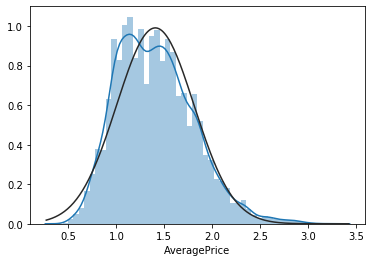

In [18]:
from scipy.stats import norm
sns.distplot(a=df.AveragePrice.dropna(), fit=norm)
plt.show()

*Вероятно, распределение стремится к нормальному (распр. Стьюдента?), однако есть ассиметрия.*

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

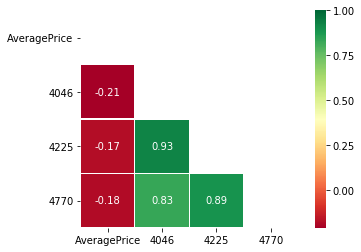

In [19]:
cols = ["AveragePrice","4046","4225","4770"]
corr = df[cols].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=corr, mask=mask, annot=True, cmap='RdYlGn', linewidths=0.2, square=True)
plt.show()

*Продажи сортов 4046, 4225 и 4770 сильно связаны между собой. Вероятно, что все эти параметры зависят от какой-то другой (других) переменных, и изменяются вместе.  
Корреляции переменных со средней ценой - слабая отрицательные. Т.е. влияние высокой цены на продажи существует, однако не слишком выражено.*

Написать временные предсказания цен на авокадо типа organic для выбранного региона: LasVegas, начиная с августа 2017 года до конца марта 2018. В качестве тренировочных данных использовать данные до июля 2017 года включительно.
В качестве примера использовать лекционный материал в lecture_1.ipynb

In [20]:
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [21]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [22]:
from datetime import datetime
train_date_start = datetime(2015,1,1)
train_date_end = datetime(2017,8,1)
df_lv = df[ \
           (df["type"] == 'organic') & \
           (df["region"].str.contains("LasVegas")) \
          ]
# Данные для обучения
train_set = df_lv[ pd \
                      .to_datetime(df_lv.Date) \
                      .between(train_date_start,train_date_end) \
                 ].loc[:,["Date", "AveragePrice"]]

train_set.rename(columns={'Date':'ds', 'AveragePrice':'y'}, inplace=True)
train_set.sort_values(by="ds", inplace=True)

# Проверочные данные
check_set = df_lv[ pd \
                      .to_datetime(df_lv.Date) \
                      .gt(train_date_end) \
                 ].loc[:,["Date", "AveragePrice"]]

check_set.rename(columns={'Date':'ds', 'AveragePrice':'y'}, inplace=True)
check_set.sort_values(by="ds", inplace=True)


In [23]:
train_set.head()

,ds,y
10269,2015-01-04,1.50
10268,2015-01-11,1.54
10267,2015-01-18,1.63
10266,2015-01-25,1.66
10265,2015-02-01,1.60


In [24]:
check_set.head()

,ds,y
15875,2017-08-06,1.74
15874,2017-08-13,2.05
15873,2017-08-20,2.43
15872,2017-08-27,2.47
15871,2017-09-03,2.64


In [25]:
m = Prophet(weekly_seasonality=True,daily_seasonality=False)
m.fit(train_set)

In [26]:
future_periods = len(check_set)
# Т.к данные есть только на вс - make_future_dataframe использовать смысла нет (он делает сет по дням)
# forecast = m.make_future_dataframe(periods=future_periods)

# Передаем даты из check_set (с 01.08.2017 по 25.03.2018)
forecast = m.predict(check_set)

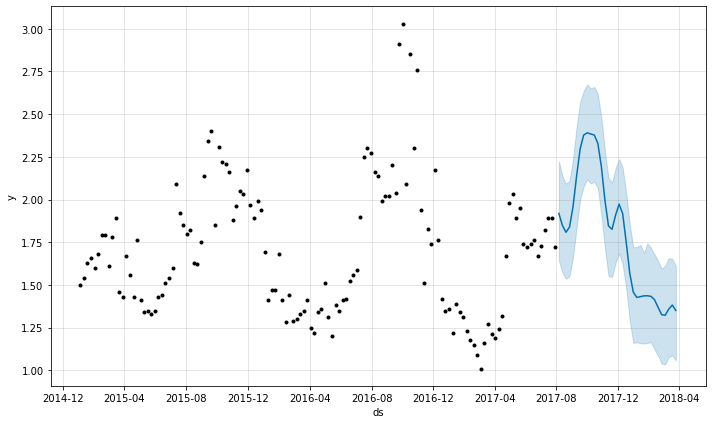

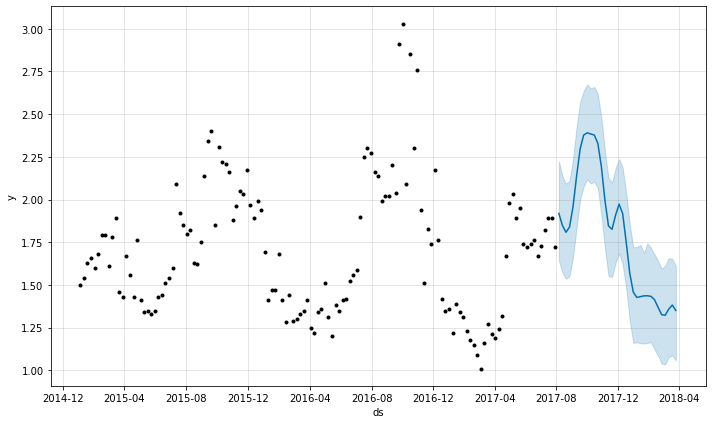

In [27]:
m.plot(forecast)

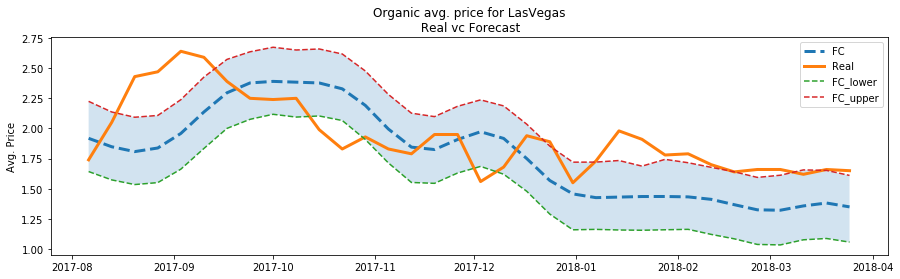

In [28]:
# Визуализация прогноза

plt.figure(figsize=(15,4))
plt.plot(forecast['ds'], forecast['yhat'], lw=3, linestyle="--")
plt.plot(forecast['ds'], check_set['y'], lw=3)
plt.plot(forecast['ds'], forecast['yhat_lower'], linestyle="--")
plt.plot(forecast['ds'], forecast['yhat_upper'], linestyle="--")

plt.gcf().axes[0].fill_between( \
                              forecast['ds'], \
                              forecast['yhat_lower'], \
                              forecast['yhat_upper'], \
                              alpha=0.2 \
                             )
plt.title("Organic avg. price for LasVegas\n Real vc Forecast")
plt.ylabel("Avg. Price")
plt.legend(("FC","Real","FC_lower","FC_upper"),loc="best")
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean Squared Error
print(mean_squared_error(check_set['y'], forecast['yhat']))
# R-squared
print(r2_score(check_set['y'], forecast['yhat']))
# Mean Absolute Error
print(mean_absolute_error(check_set['y'], forecast['yhat']))

0.11661381728138927
-0.3005091145450911
0.29884189575309744
